<a href="https://colab.research.google.com/github/RahulKamma0369/Rahul/blob/master/Neural_Network_Image_Classificationn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Imports

In [0]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.python.framework import ops
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2,decode_predictions,preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from IPython.core.display import display
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19,VGG19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

In [0]:
file1='01 Umbrella.jpg'
file2='02 Couple.jpg'
file3='03 Ocean.jpg'
file4='04 Horse.jpg'
 

## Pre-Processing Imagessss

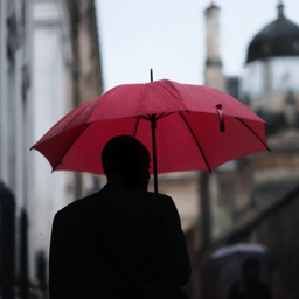

In [52]:
pic=load_img(file1,target_size=(299,299))
display(pic)

In [53]:
pic_array=img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [54]:
expanded=np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

# Load InceptionResNet

In [0]:
preprocessed=preprocess_input(expanded)

In [45]:
%%time
inception_model=VGG19(weights='imagenet')

CPU times: user 13.5 s, sys: 435 ms, total: 13.9 s
Wall time: 13.5 s


In [0]:
inception_model.graph=ops.get_default_graph()

In [49]:
inception_model.graph

# Making Prediction


In [62]:
prediction=inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.001057236),
  ('n03220513', 'dome', 0.0010310992)]]

In [0]:
def format_img_inception_resnet(filename):
    file=load_img(filename,target_size=(299,299))
    pic_array=img_to_array(file)
    expanded=np.expand_dims(file,axis=0)
    return preprocess_input(expanded)

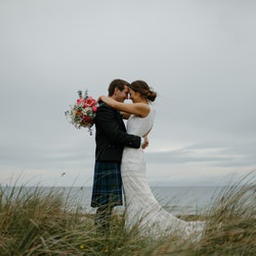

[[('n10148035', 'groom', 0.70423883),
  ('n03450230', 'gown', 0.116695486),
  ('n11879895', 'rapeseed', 0.016582672),
  ('n09421951', 'sandbar', 0.012790635),
  ('n03534580', 'hoopskirt', 0.00728777)]]

In [67]:
data=format_img_inception_resnet(file2)
prediction=inception_model.predict(data)
display(load_img(file2))
decode_predictions(prediction)

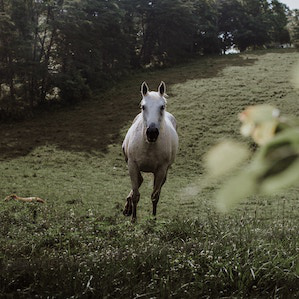

[[('n02389026', 'sorrel', 0.4483173),
  ('n02412080', 'ram', 0.029898994),
  ('n02106030', 'collie', 0.01969456),
  ('n04604644', 'worm_fence', 0.016888157),
  ('n04049303', 'rain_barrel', 0.013531385)]]

In [71]:
data=format_img_inception_resnet(file4)
display(load_img(file4))
prediction=inception_model.predict(data)
decode_predictions(prediction)

In [0]:
def format_img_vgg19(filename):
    file=load_img(filename,target_size=(224,224))
    pic_array=img_to_array(file)
    expanded=np.expand_dims(file,axis=0)
    return preprocess_input_vgg19(expanded)

In [0]:
vgg_19_model=VGG19()

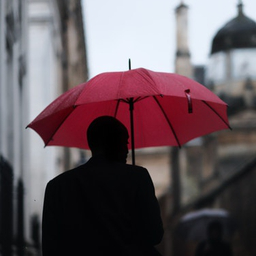

[[('n04507155', 'umbrella', 0.99998045),
  ('n03599486', 'jinrikisha', 2.9043708e-06),
  ('n03637318', 'lampshade', 2.5537777e-06),
  ('n07734744', 'mushroom', 1.6436776e-06),
  ('n03888257', 'parachute', 1.2324567e-06)]]

In [86]:
data=format_img_vgg19(file1)
display(load_img(file1))
prediction=vgg_19_model.predict(data)
decode_vgg19(prediction)

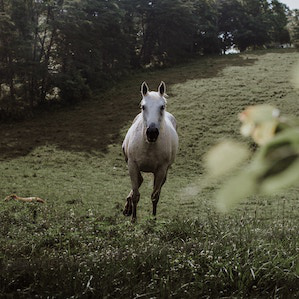

[[('n02412080', 'ram', 0.7342518),
  ('n02415577', 'bighorn', 0.1160941),
  ('n02403003', 'ox', 0.017533273),
  ('n02437616', 'llama', 0.01144305),
  ('n02091134', 'whippet', 0.00935114)]]

In [87]:
data=format_img_vgg19(file4)
display(load_img(file4))
prediction=vgg_19_model.predict(data)
decode_vgg19(prediction)